### Loading Libraries

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Loading Data

In [429]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
census_income = fetch_ucirepo(id=20) 
  
# data (as pandas dataframes) 
df = census_income.data.features 
y = census_income.data.targets 

#### Data Description

| **Attribute**       | **Description**                                                                                  |
|----------------------|--------------------------------------------------------------------------------------------------|
| **Age**             | Describes the age of individuals. *Continuous*.                                                 |
| **Workclass**       | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. |
| **fnlwgt**          | *Continuous*.                                                                                   |
| **Education**       | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. |
| **Education-num**   | Number of years spent in education. *Continuous*.                                               |
| **Marital-status**  | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. |
| **Occupation**      | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. |
| **Relationship**    | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                              |
| **Race**            | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                    |
| **Sex**             | Female, Male.                                                                                   |
| **Capital-gain**    | *Continuous*.                                                                                   |
| **Capital-loss**    | *Continuous*.                                                                                   |
| **Hours-per-week**  | *Continuous*.                                                                                   |
| **Native-country**  | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |
| **Salary**          | >50K, <=50K.                                                                                    |


In [430]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [431]:
df['income'] = y

In [432]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


---

In [434]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [435]:
for col in df.columns:
    print('------------')
    print(col)
    print(df[col].unique())

------------
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
------------
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
------------
fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]
------------
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
------------
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
------------
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
------------
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-

We need to address the '?' values, on workclass, native-country,occupation

In [436]:
df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)
df.replace('?', np.nan, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17048\580547441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)


In [437]:
df.isna().sum() / len(df) * 100

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64

In [438]:
for col in ['workclass','native-country','occupation']:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17048\2710301076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [439]:
df.isna().sum() / len(df) * 100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

### 3.Univariate Analysis

In [440]:
numerical_cols = df.select_dtypes(include=['int'])
categorical_cols = df.select_dtypes(include=['object'])

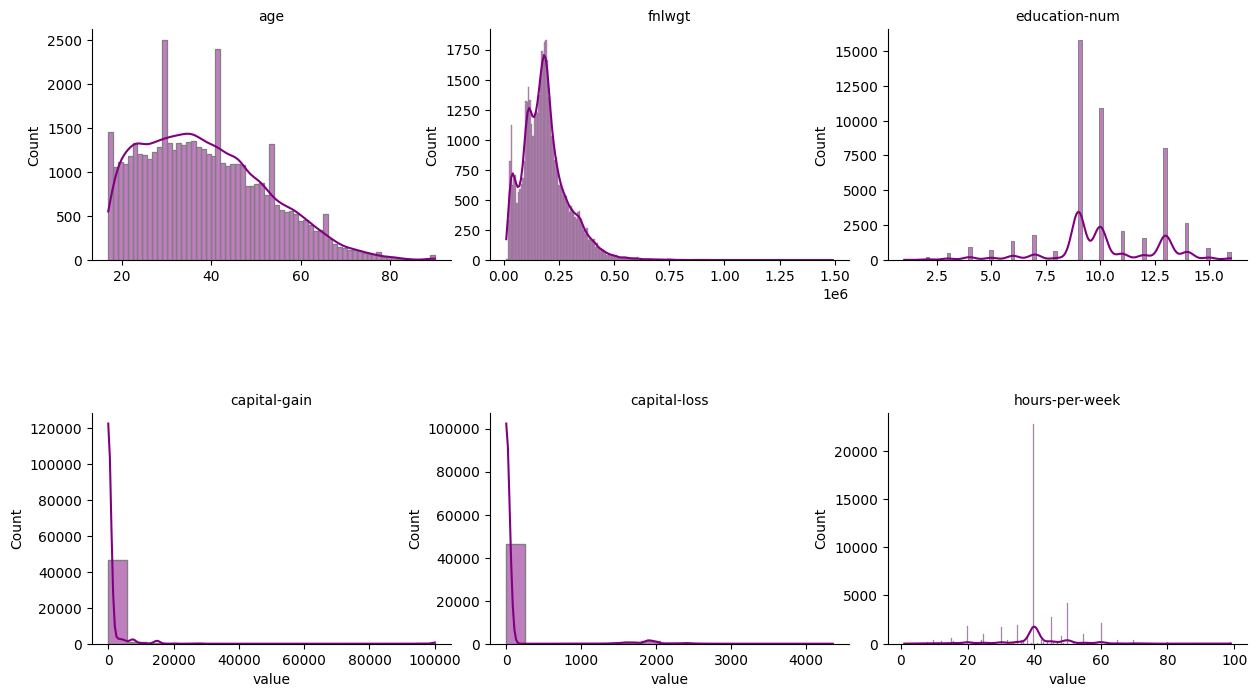

In [441]:
df_melt_num = numerical_cols.melt()
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=3, height=2,aspect=5,sharex=False, sharey=False)
g.map(sns.histplot, "value", color="purple", kde=True, edgecolor="grey")
g.set_titles("{col_name}")
g.fig.set_size_inches(12, 8)
plt.show()

d:\Repositories\6005CEM-ML\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


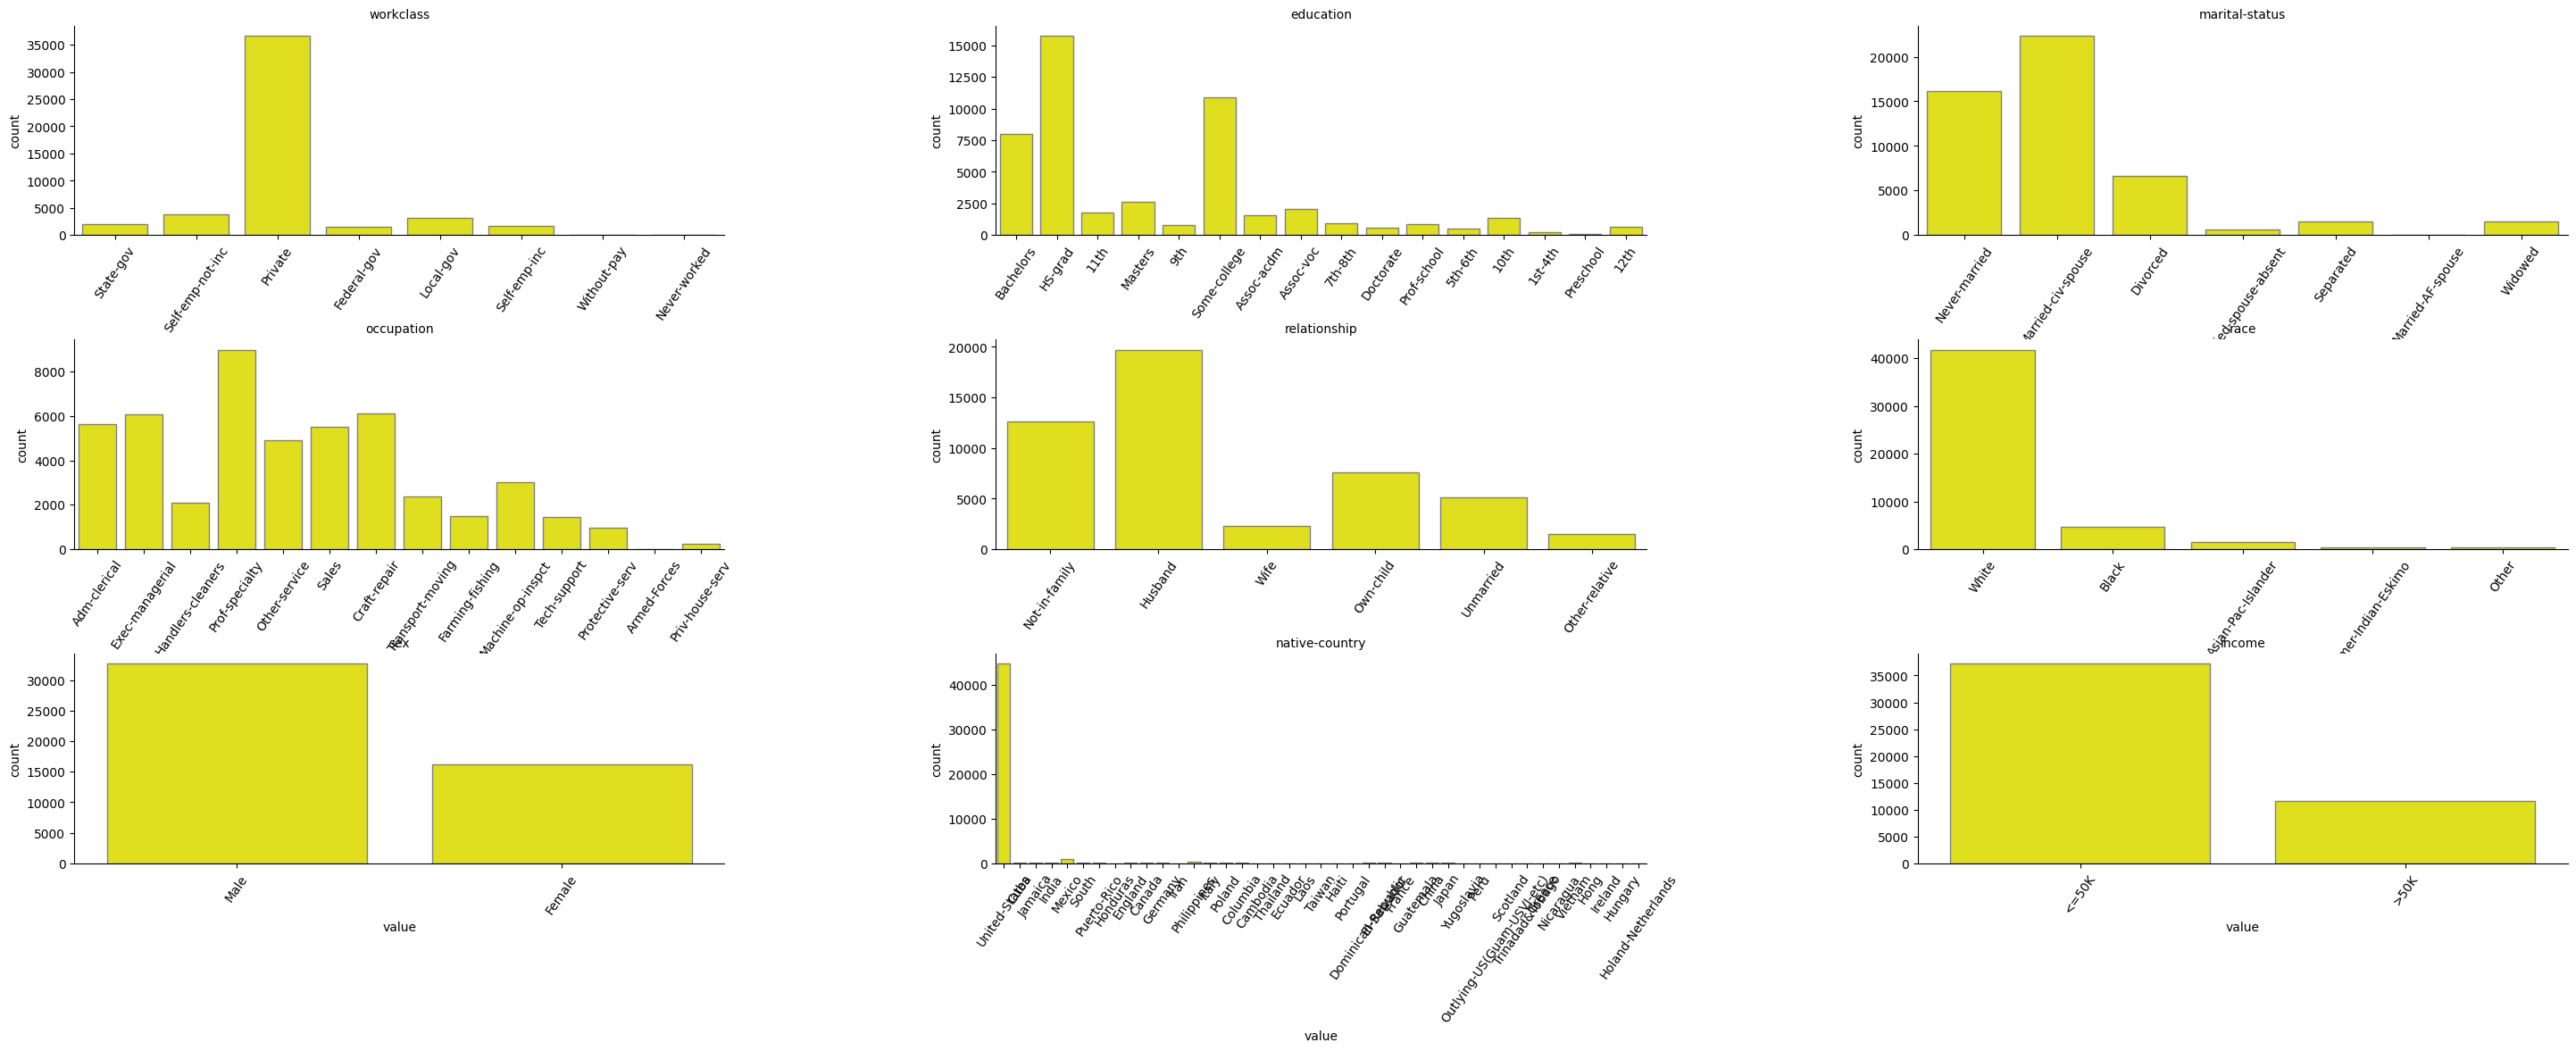

In [442]:
df_melt_cat = categorical_cols.melt()
g = sns.FacetGrid(df_melt_cat, col="variable", col_wrap=3, height=5, sharex=False, sharey=False)
g.map(sns.countplot, "value", color="yellow", edgecolor="grey")
g.set_titles("{col_name}")
g.figure.set_size_inches(30,10)
g.set_xticklabels(rotation=55)
g.figure.subplots_adjust(hspace=0.5)  # Adjust the space between graphs
plt.show()

### 4. Bivariate Analysis

In [443]:
numerical_cols['income'] = df[['income']]
df_melt_num = numerical_cols.melt(id_vars=['income'])

d:\Repositories\6005CEM-ML\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


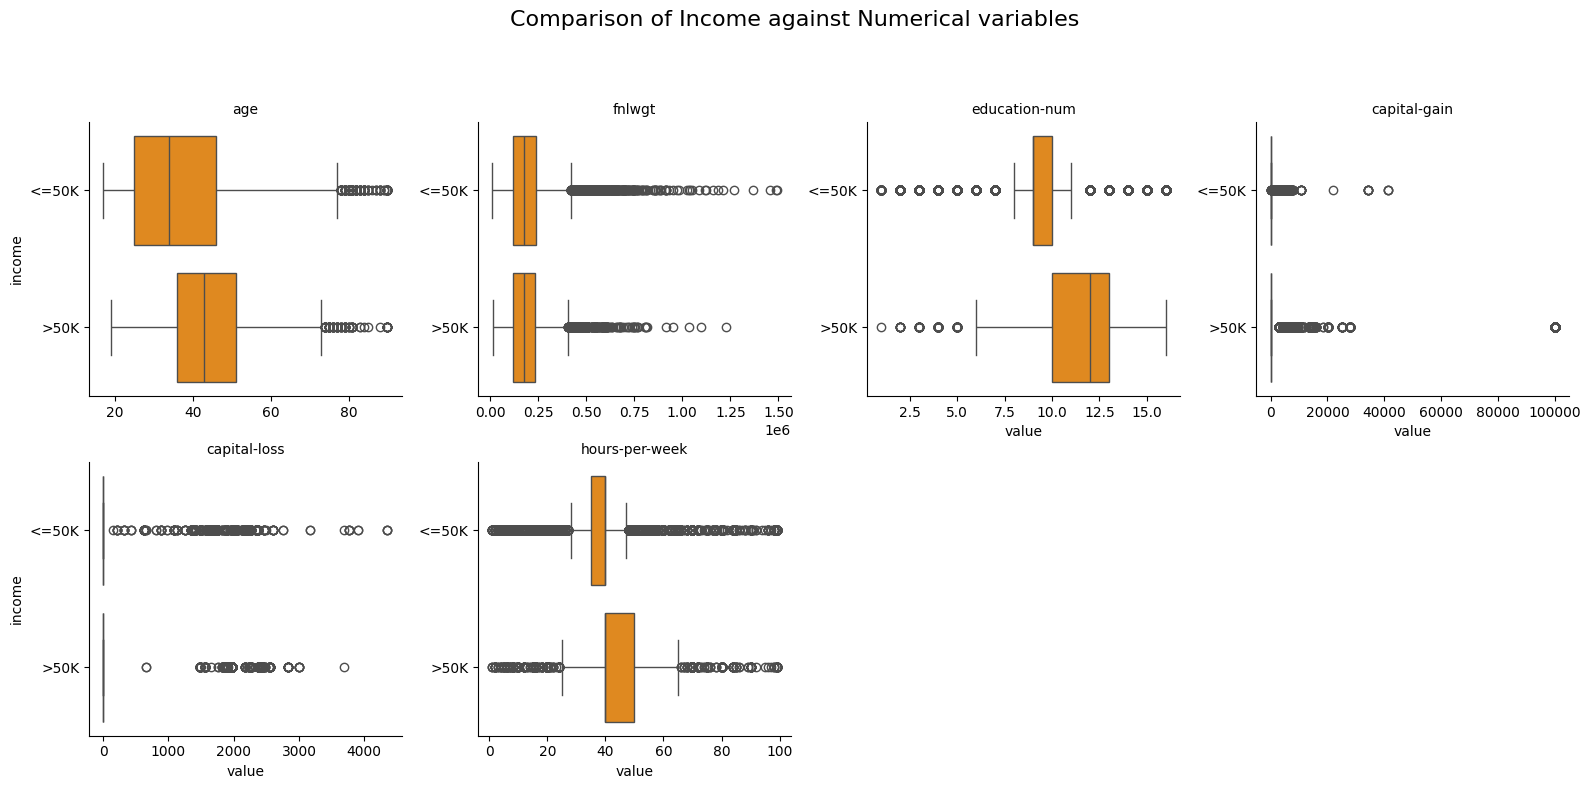

In [444]:
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.boxplot,"value",'income', color="darkorange")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.84) 
g.figure.suptitle("Comparison of Income against Numerical variables", fontsize=16)
plt.show()

In [445]:
categorical_cols['income'] = df[['income']]
df_melt_cat = categorical_cols.melt(id_vars=['income'])

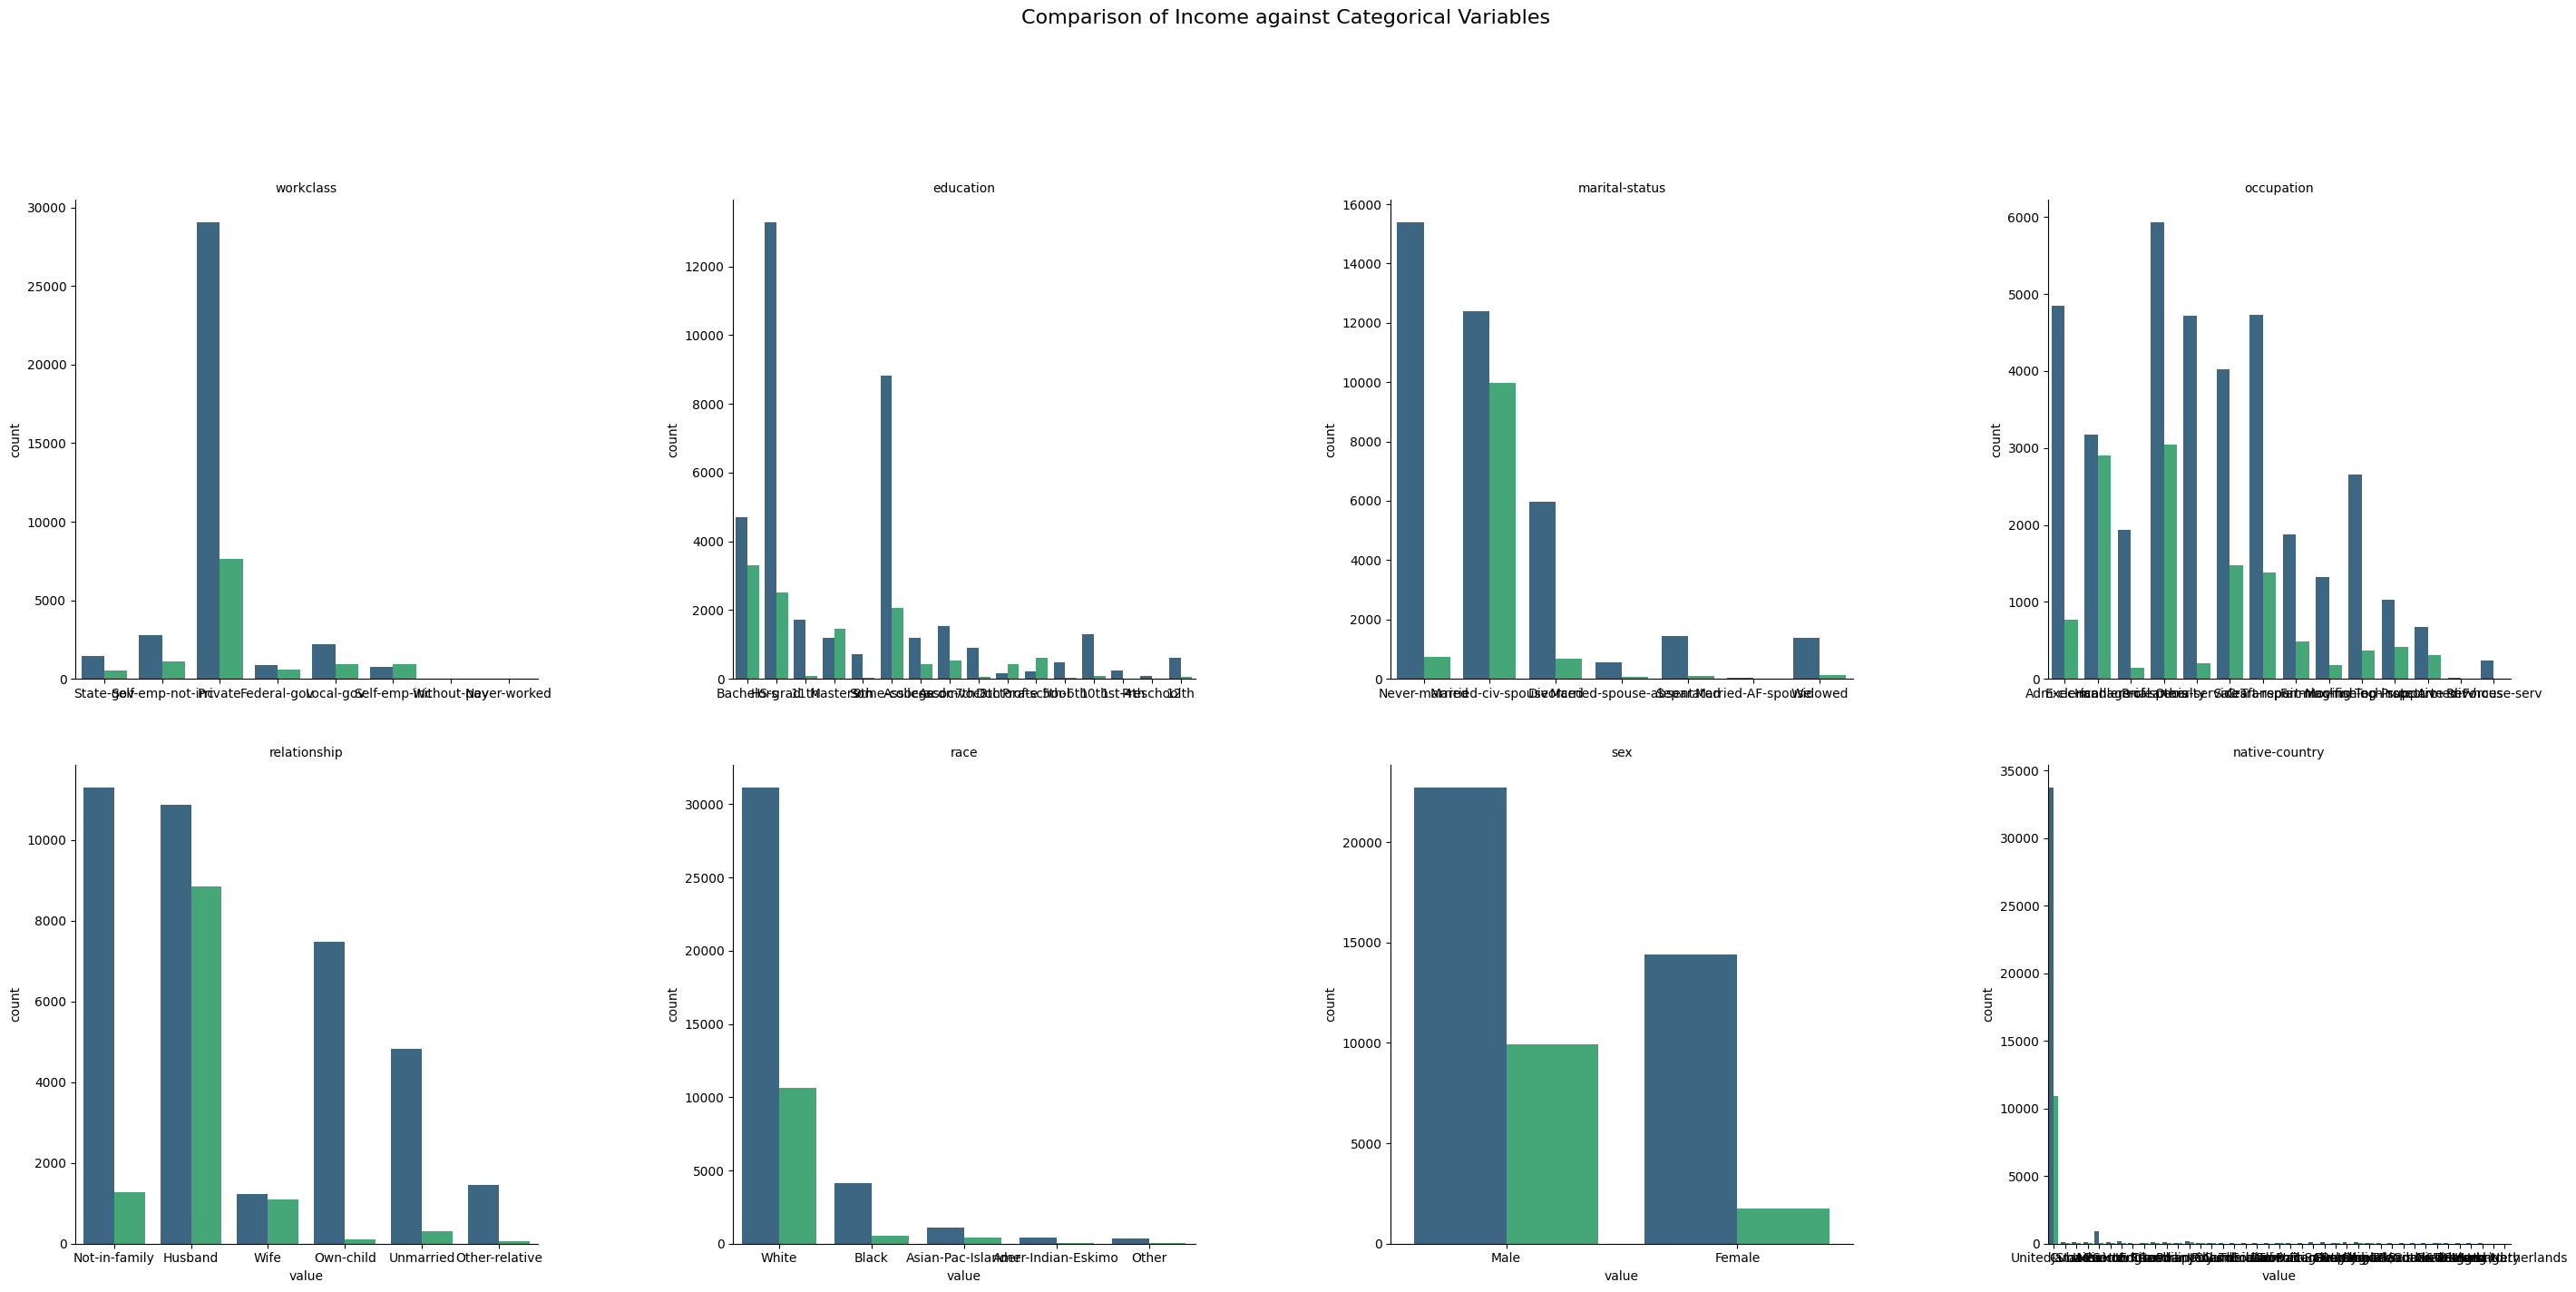

In [446]:
g = sns.FacetGrid(df_melt_cat, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x="value", hue="income",palette='viridis')  
g.figure.set_size_inches(30,15)
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.84)
g.figure.suptitle("Comparison of Income against Categorical Variables", fontsize=16)

plt.show()

### Feature Engineering

In [447]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [448]:
df['education_level'] = df['education'].map( {
    'Preschool': 'basic',
    '1st-4th': 'basic',
    '5th-6th': 'basic',
    '7th-8th': 'basic',
    '9th': 'basic',
    '10th': 'highschool',
    '11th': 'highschool',
    '12th': 'highschool',
    'HS-grad': 'highschool',
    'Some-college': 'undergrad',
    'Assoc-acdm': 'undergrad',
    'Assoc-voc': 'undergrad',
    'Bachelors': 'undergrad',
    'Masters': 'grad',
    'Doctorate': 'postgraduate',
    'Prof-school': 'postgraduate'
})

In [449]:
df['capital-net'] = df['capital-gain'] - df['capital-loss']
df['capital-net'].fillna(df['capital-net'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17048\568784611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['capital-net'].fillna(df['capital-net'].mean(), inplace=True)


In [450]:
df['sector'] = df['workclass'].map({
    'Private': 'Private',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Self-emp-not-inc': 'Self_Employed',
    'Self-emp-inc': 'Self_Employed',
    'Without-pay': 'Other',
    'Never-worked': 'Other'
})

In [451]:
df['capital_per_hour'] = df['capital-net'] / df['hours-per-week']

### 5. Data Preprocessing

In [452]:
numerical_cols = df.select_dtypes(include=['int'])
categorical_cols = df.select_dtypes(include=['object'])

quick overview of categorical:


In [453]:
for col in categorical_cols.columns:
   print('-'*10)
   print(col)
   print(categorical_cols[col].unique())

----------
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
----------
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
----------
relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
----------
race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
----------
sex
['Male' 'Female']
----------
native-country
['United-States' 'Cuba' 'Jam

only education is ordinal

#### Process Ordinal Data

In [454]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']
]
encoder = OrdinalEncoder(categories=education_order)
df['education'] = encoder.fit_transform(df[['education']])


education_level_order = [
['basic','highschool','undergrad','grad','postgraduate']
]
encoder = OrdinalEncoder(categories=education_level_order)
df['education_level'] = encoder.fit_transform(df[['education_level']])

In [455]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [456]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
race_encoded = ohe.fit_transform(df[['race']]).toarray()


race_encoded = pd.DataFrame(race_encoded, columns=ohe.get_feature_names_out(['race']))
race_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, race_encoded], axis=1)
df.drop(columns=['race'],inplace=True)

In [457]:
ohe = OneHotEncoder()
relationship_encoded = ohe.fit_transform(df[['relationship']]).toarray()


relationship_encoded = pd.DataFrame(relationship_encoded, columns=ohe.get_feature_names_out(['relationship']))
relationship_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, relationship_encoded], axis=1)
df.drop(columns=['relationship'],inplace=True)

In [458]:
sector_encoded = ohe.fit_transform(df[['sector']]).toarray()


sector_encoded = pd.DataFrame(sector_encoded, columns=ohe.get_feature_names_out(['sector']))
sector_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, sector_encoded], axis=1)
df.drop(columns=['sector'],inplace=True)

In [459]:
from sklearn.preprocessing import TargetEncoder
target_cols = ['native-country','workclass','occupation','marital-status']
encoder = TargetEncoder()
for col in target_cols:
    df[col] = encoder.fit_transform(df[[col]], df['income'])

In [460]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sector_Government,sector_Other,sector_Private,sector_Self_Employed
0,39,0.272880,77516,12.0,13,0.045796,0.141896,0,2174,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,50,0.284907,83311,12.0,13,0.446393,0.479508,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38,0.208451,215646,8.0,9,0.102960,0.065976,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,0.208707,234721,6.0,7,0.445757,0.066067,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,0.208451,338409,12.0,13,0.445757,0.338447,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0.208707,215419,12.0,13,0.102960,0.338447,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48838,64,0.207822,321403,8.0,9,0.082912,0.339724,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48839,38,0.208451,374983,12.0,13,0.444956,0.339724,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48840,44,0.207919,83891,12.0,13,0.101765,0.137830,0,5455,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [461]:
for col in df.columns:
   print('-'*10)
   print(col)
   print(df[col].unique())

----------
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
----------
workclass
[0.2728796  0.28490685 0.2084506  0.20870725 0.27336454 0.20946866
 0.2079194  0.26027726 0.20782193 0.28064802 0.38746235 0.29299467
 0.29213775 0.38041749 0.39773365 0.55673401 0.5592403  0.30093824
 0.39189443 0.27778208 0.40033673 0.54508304 0.27756764 0.5493173
 0.26801557 0.29761143 0.26540312 0.27115384 0.55508135 0.29420906
 0.12159515 0.         0.15830139 0.0619953  0.05845127 0.10881617]
----------
fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]
----------
education
[12.  8.  6. 13.  4.  9. 10. 11.  3. 14. 15.  2.  5.  1.  0.  7.]
----------
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
----------
marital-status
[0.04579567 0.44639286 0.10295956 0.44575738 0.4472482  0.0906733
 0.44495596 0.0

#### Numerical Variables

In [462]:
for col in numerical_cols.columns:
     print(f'{col} skewness : {df[col].skew():.2f}')


age skewness : 0.56
fnlwgt skewness : 1.44
education-num skewness : -0.32
capital-gain skewness : 11.89
capital-loss skewness : 4.57
hours-per-week skewness : 0.24
capital-net skewness : 11.81


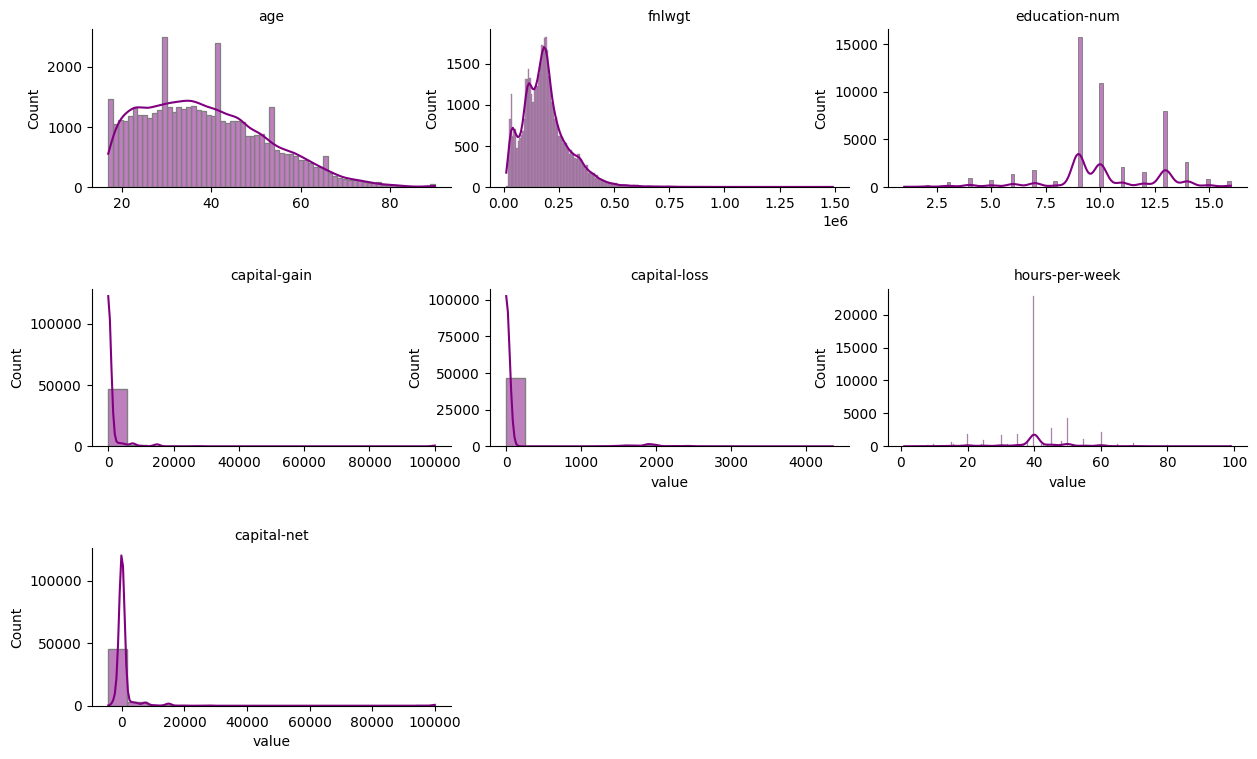

In [463]:
df_melt_num = numerical_cols.melt()
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=3, height=2,aspect=5,sharex=False, sharey=False)
g.map(sns.histplot, "value", color="purple", kde=True, edgecolor="grey")
g.set_titles("{col_name}")
g.fig.set_size_inches(12, 8)
plt.show()

In [464]:
df[df['capital-net']<0]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sector_Government,sector_Other,sector_Private,sector_Self_Employed
23,43,0.207822,117037,6.0,7,0.445757,0.208640,0,0,2042,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32,45,0.209469,386940,12.0,13,0.101765,0.478890,0,0,1408,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
52,47,0.208451,51835,15.0,15,0.445757,0.339724,1,0,1902,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
93,30,0.208707,117747,8.0,9,0.447248,0.271278,1,0,1573,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
96,48,0.277782,191277,14.0,16,0.447248,0.338447,0,0,1902,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48783,19,0.209469,156618,8.0,9,0.045338,0.045052,1,0,1602,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48794,29,0.294209,170482,8.0,9,0.446232,0.318812,0,0,2057,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48802,51,0.207822,29887,12.0,13,0.104741,0.293360,0,0,1590,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48814,39,0.207919,229647,12.0,13,0.045253,0.295224,1,0,1669,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [465]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(x):
    return np.log(x + 1)

df['fnlwgt'] =  FunctionTransformer(log_transform).fit_transform(df['fnlwgt'])
df['capital-loss'] = FunctionTransformer(log_transform).fit_transform(df['capital-loss'])
df['capital-gain'] = FunctionTransformer(log_transform).fit_transform(df['capital-gain'])  

In [466]:
def shift_and_log(x):
    min_val = x.min()
    
    if min_val < 0:
        shift = abs(min_val) + 1  # Add 1 to avoid log(0)
        shifted = x + shift
    else:
        # add 1 to avoid log(0)
        shifted = x + 1

    return np.log(shifted)
    

df['capital-net'] = FunctionTransformer(shift_and_log).fit_transform(df['capital-net'])  

In [467]:
for col in numerical_cols.columns:
     print(f'{col} skewness : {df[col].skew():.2f}')


age skewness : 0.56
fnlwgt skewness : -0.84
education-num skewness : -0.32
capital-gain skewness : 3.11
capital-loss skewness : 4.30
hours-per-week skewness : 0.24
capital-net skewness : 3.34


#### Feature Selection

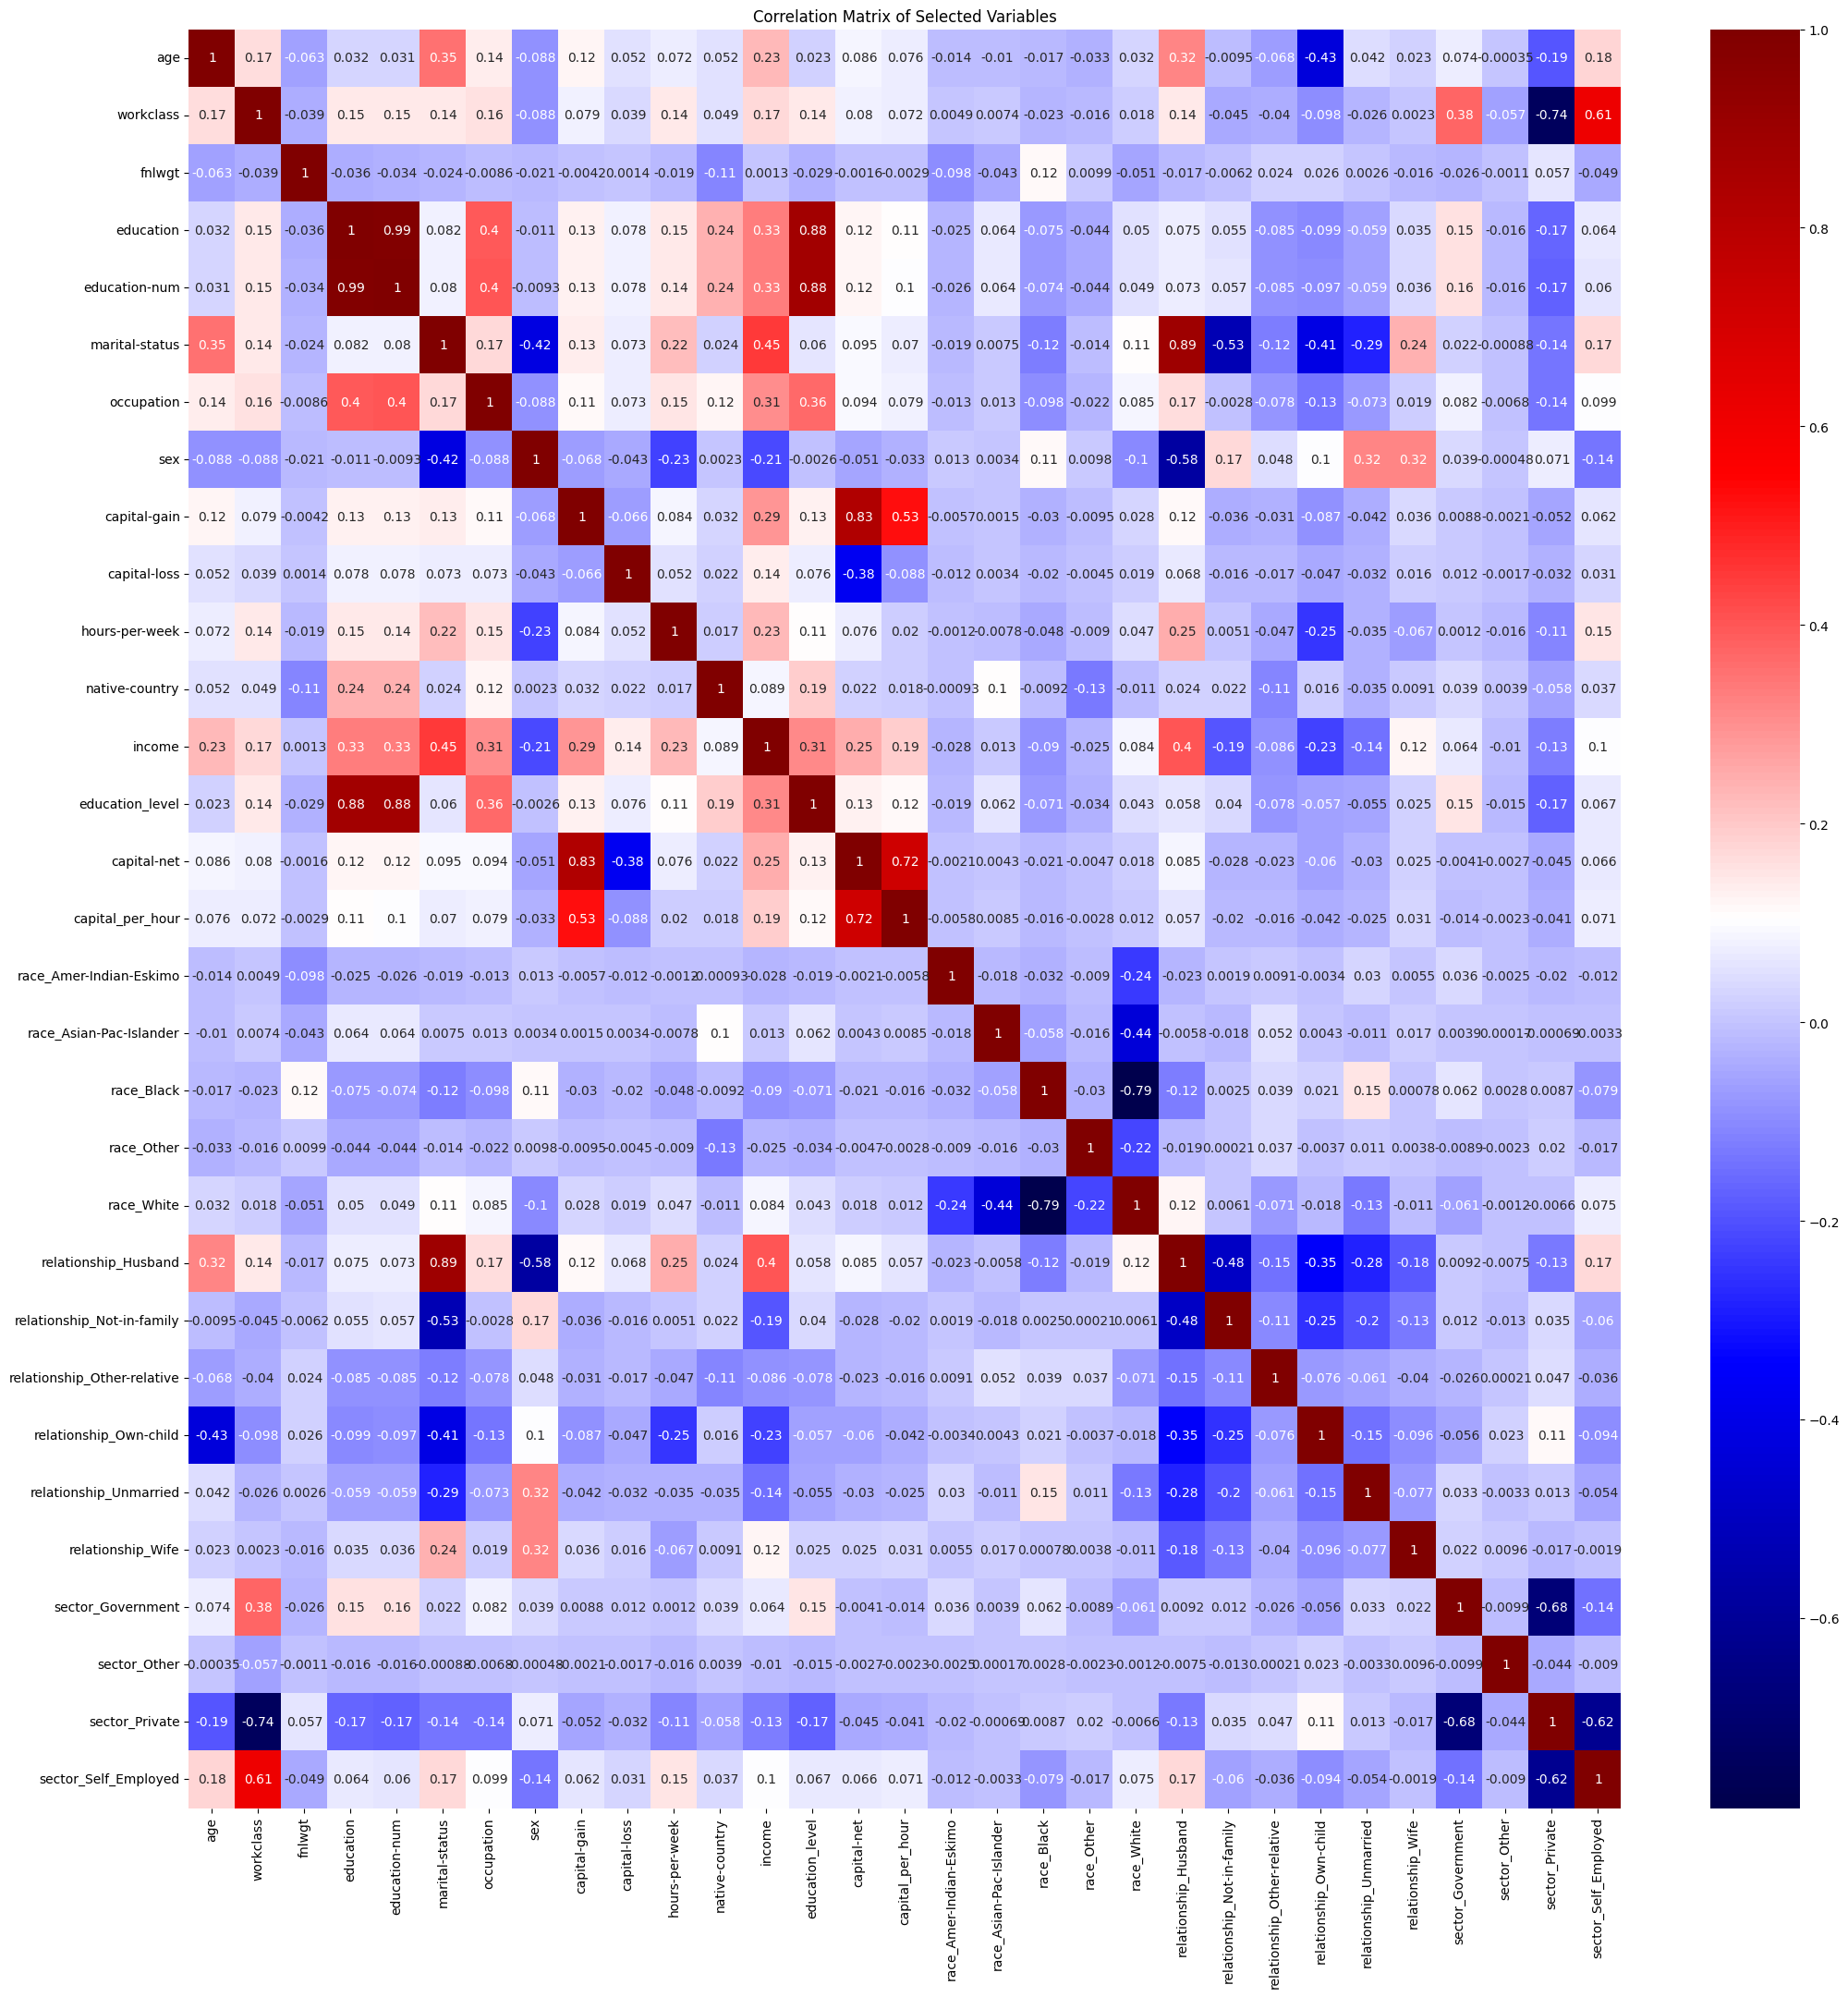

In [468]:
plt.figure(figsize=(25,25))
plt.title('Correlation Matrix of Selected Variables')
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

Text(0.5, 1.0, 'Correlation to Income')

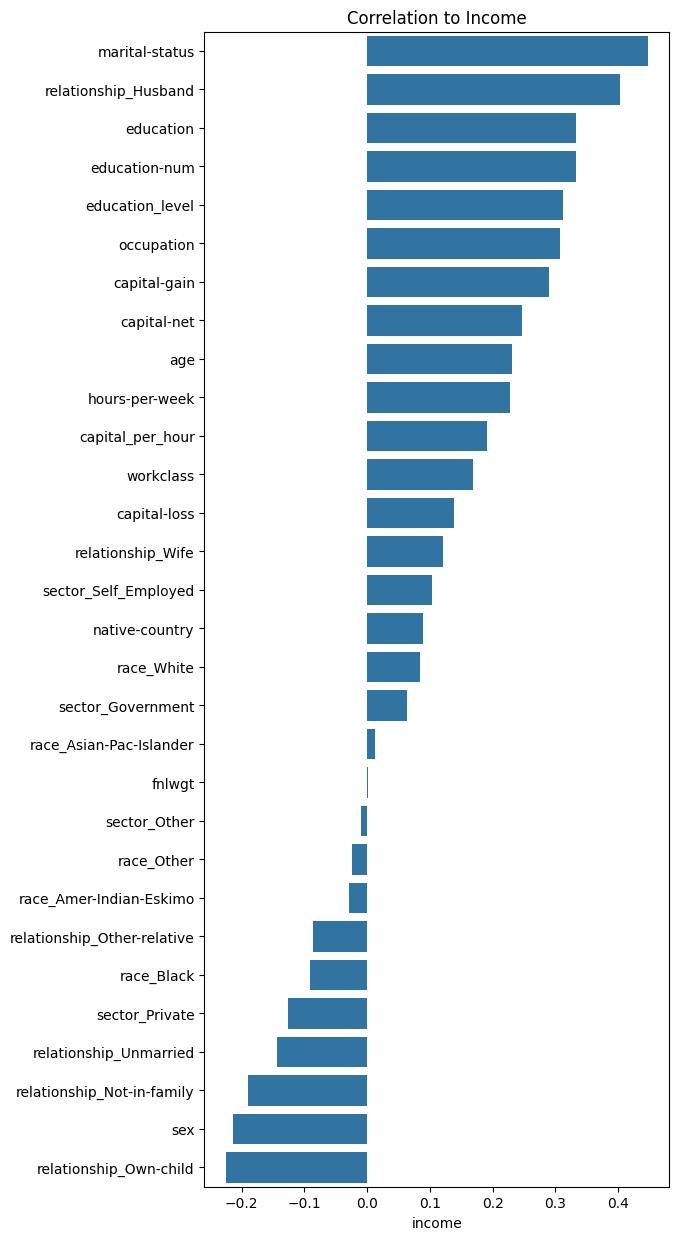

In [469]:
plt.figure(figsize=(6,15))
sns.barplot(df.corr()['income'].drop('income').sort_values(ascending=False),orient = 'h')
plt.title('Correlation to Income')


In [470]:
col_to_drop = []
for col, v in df.corr()['income'].items():
    if -0.2 < v < 0.2:
        col_to_drop.append(col)
        print(col)


workclass
fnlwgt
capital-loss
native-country
capital_per_hour
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
relationship_Not-in-family
relationship_Other-relative
relationship_Unmarried
relationship_Wife
sector_Government
sector_Other
sector_Private
sector_Self_Employed


In [471]:
df.drop(columns=col_to_drop,inplace=True)

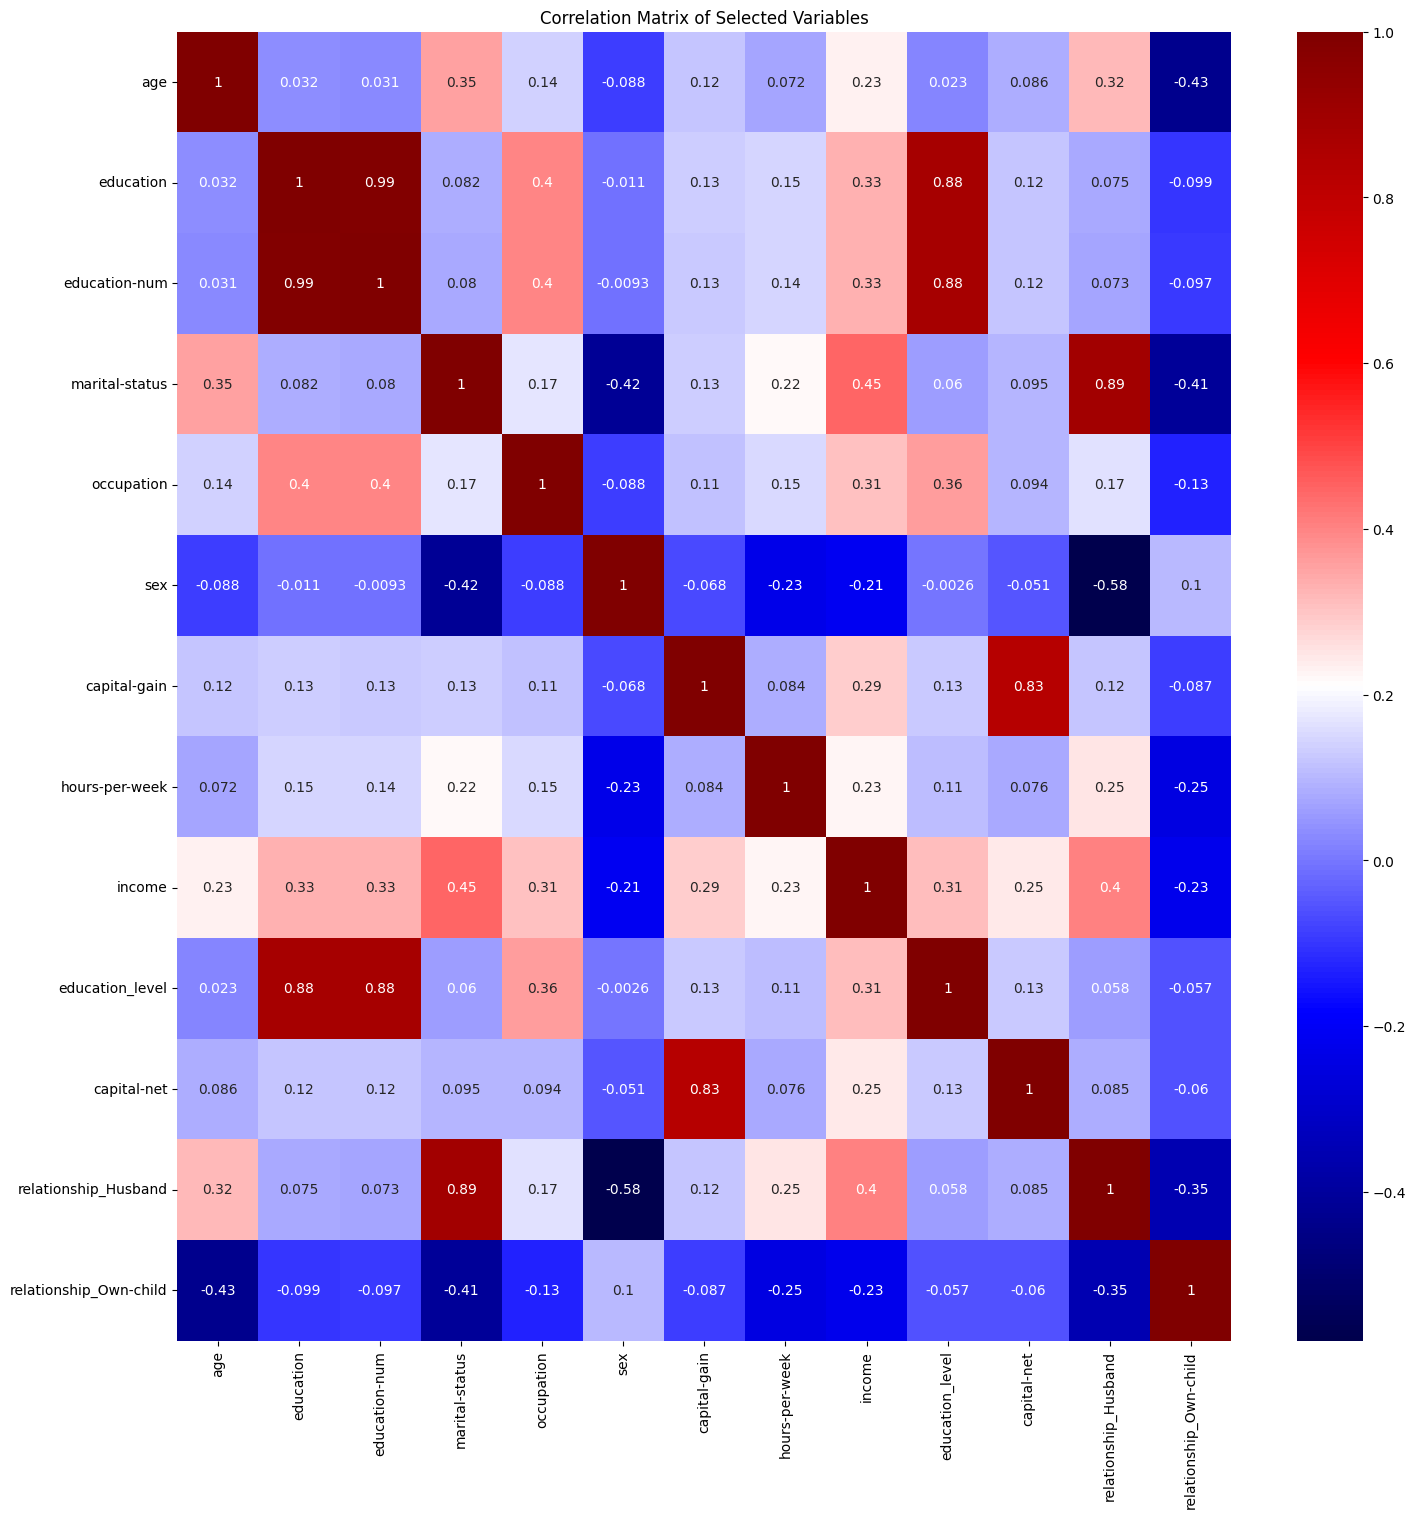

In [472]:
plt.figure(figsize=(17,17))
plt.title('Correlation Matrix of Selected Variables')
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

#### Modelling

In [473]:
X = df.drop('income',axis=1)
X.head(3)

,age,education,education-num,marital-status,occupation,sex,capital-gain,hours-per-week,education_level,capital-net,relationship_Husband,relationship_Own-child
0,39,12.0,13,0.045796,0.141896,0,7.684784,40,2.0,8.784315,0.0,0.0
1,50,12.0,13,0.446393,0.479508,0,0.000000,13,2.0,8.379539,1.0,0.0
2,38,8.0,9,0.102960,0.065976,0,0.000000,40,1.0,8.379539,0.0,0.0


In [474]:
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [475]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,shuffle=True,random_state=42,test_size=0.25)
print(f'X shape: {X_train.shape},{X_test.shape}')
print(f'y shape: {y_train.shape},{y_test.shape}')

X shape: (36631, 12),(12211, 12)
y shape: (36631,),(12211,)


In [476]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

reg_pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [477]:
X_train_scaled = reg_pipe.fit_transform(X_train)
X_test_scaled = reg_pipe.transform(X_test)
X_scaled = reg_pipe.fit_transform(X)

In [478]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [479]:
y_pred = lr.predict(X_test_scaled)

<Axes: title={'center': 'Confusion Matrix of Logistic Regression'}>

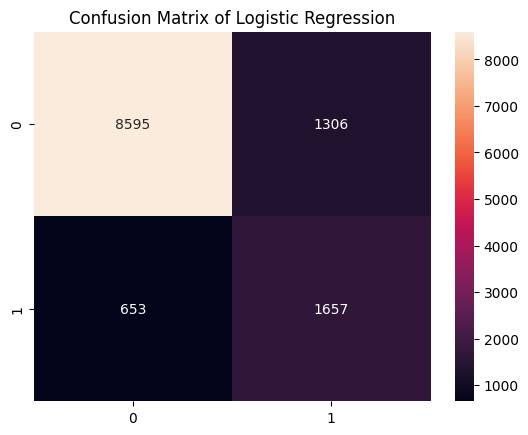

In [480]:
plt.title('Confusion Matrix of Logistic Regression')
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt=".0f")

In [481]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred_knn = knn.predict(X_test_scaled)

<Axes: title={'center': 'Confusion Matrix of K-Nearest Neighbours'}>

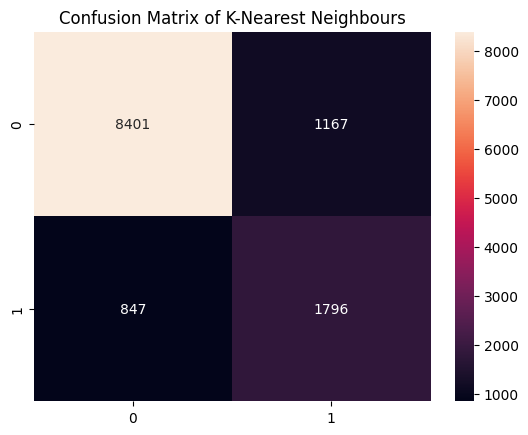

In [482]:
plt.title('Confusion Matrix of K-Nearest Neighbours')
sns.heatmap(confusion_matrix(y_pred_knn,y_test),annot=True,fmt=".0f",)

In [483]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
y_pred_svc = svc.predict(X_test_scaled)

<Axes: title={'center': 'Confusion Matrix of Support Vector Machine'}>

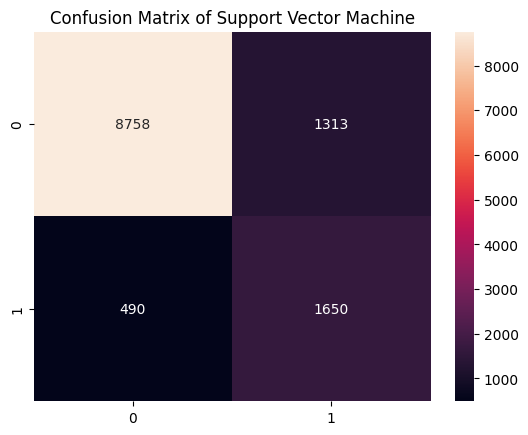

In [484]:
accuracy_score(y_pred_svc,y_test)
plt.title('Confusion Matrix of Support Vector Machine')
sns.heatmap(confusion_matrix(y_pred_svc,y_test),annot=True,fmt=".0f",)

#### Model Tuning

In [485]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [486]:
X_train.shape

(36631, 12)

In [487]:
model_nn = Sequential()
model_nn.add(Dense(9, activation='relu', input_shape=(12,))) #Input + hidden
model_nn.add(Dense(6, activation='relu')) # Hidden Layer 1
model_nn.add(Dense(1, activation='sigmoid'))  # Output layer
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy', #For binary classification
              metrics=['accuracy'])

d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [488]:
model_nn.fit(X_train_scaled,y_train,epochs=10, 
                    validation_split=0.25)

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - accuracy: 0.7563 - loss: 0.4994 - val_accuracy: 0.8352 - val_loss: 0.3360
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8397 - loss: 0.3299 - val_accuracy: 0.8439 - val_loss: 0.3252
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.8483 - loss: 0.3190 - val_accuracy: 0.8463 - val_loss: 0.3208
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.8509 - loss: 0.3139 - val_accuracy: 0.8488 - val_loss: 0.3181
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8505 - loss: 0.3138 - val_accuracy: 0.8495 - val_loss: 0.3168
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.8505 - loss: 0.3118 - val_accuracy: 0.8491 - val_loss: 0.3161
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8565 - loss: 0.3062 - val_accuracy: 0.8526 - val_loss: 0.3160
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.8537 - loss: 0.3129 - va

In [489]:
y_pred_nn = model_nn.predict(X_test_scaled)

382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


In [490]:
y_pred_nn = (y_pred_nn >= 0.5).astype(int)

<Axes: title={'center': 'Confusion Matrix of Basic Neural Network'}>

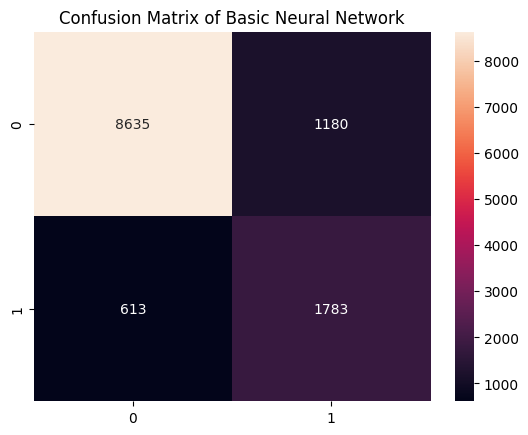

In [491]:
plt.title('Confusion Matrix of Basic Neural Network')
sns.heatmap(confusion_matrix(y_pred_nn,y_test),annot=True,fmt=".0f",)

#### Evaluation

In [492]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [493]:
def evaluate_scores(X, y, model, verbose=0):
    print('Cross Validation for 4 Folds per Metric')

    accuracy = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="accuracy")
    precision = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="precision")
    recall = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="recall")
    f1 = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="f1")

    return type(model).__name__, np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(f1)


In [494]:
from scikeras.wrappers import KerasClassifier
def model_nn():
    model = Sequential()
    model.add(Dense(9, activation='relu', input_shape=(12,))) #Input + hidden
    model.add(Dense(6, activation='relu')) # Hidden Layer 1
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam',
              loss='binary_crossentropy') #For binary classification 
    
    return model

model_nn =  KerasClassifier(build_fn=model_nn, epochs=15, batch_size=32, verbose=1)

In [495]:
df_metrics = pd.DataFrame(columns=['model','accuracy','precision','recall','f1'])

In [496]:
df_metrics.loc[0] = evaluate_scores(X_scaled,y,lr)
df_metrics.loc[1] = evaluate_scores(X_scaled,y,knn)

Cross Validation for 4 Folds per Metric
Cross Validation for 4 Folds per Metric


In [497]:
df_metrics.loc[2] = evaluate_scores(X_scaled,y,svc)

Cross Validation for 4 Folds per Metric


In [498]:
df_metrics.loc[3] = evaluate_scores(X_scaled,y,model_nn)

Cross Validation for 4 Folds per Metric
Epoch 1/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - loss: 0.4933
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - loss: 0.3348
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - loss: 0.3253
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - loss: 0.3134
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - loss: 0.3088
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - loss: 0.3120
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - loss: 0.3039
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - loss: 0.3103
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - loss: 0.3080
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - loss: 0.3034
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 0.3101
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - loss: 0.3065
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - loss: 0.3045
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - loss: 0.3073
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - loss: 0.4301
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - loss: 0.3314
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - loss: 0.3214
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - loss: 0.3182
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - loss: 0.3140
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 0.3166
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - loss: 0.3118
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.3096
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - loss: 0.3114
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - loss: 0.3084
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - loss: 0.3064
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - loss: 0.3191
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 0.3134
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 0.3109
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - loss: 0.4722
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - loss: 0.3245
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - loss: 0.3141
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 0.3174
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - loss: 0.3092
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - loss: 0.3074
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - loss: 0.3061
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - loss: 0.3113
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - loss: 0.3076
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - loss: 0.3083
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - loss: 0.3069
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - loss: 0.3091
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - loss: 0.3058
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - loss: 0.3056
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - loss: 0.4643
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - loss: 0.3410
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 659us/step - loss: 0.3302
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - loss: 0.3176
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - loss: 0.3118
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - loss: 0.3121
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 0.3095
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - loss: 0.3143
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - loss: 0.3075
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - loss: 0.3066
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 493us/step - loss: 0.3089
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.3112
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - loss: 0.3061
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - loss: 0.3101
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - loss: 0.4426
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - loss: 0.3354
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - loss: 0.3169
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - loss: 0.3141
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - loss: 0.3116
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - loss: 0.3090
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - loss: 0.3107
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - loss: 0.3088
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - loss: 0.3073
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - loss: 0.3099
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - loss: 0.3046
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - loss: 0.3093
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - loss: 0.3103
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - loss: 0.3131
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - loss: 0.4518
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - loss: 0.3392
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - loss: 0.3339
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - loss: 0.3286
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - loss: 0.3195
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 0.3229
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - loss: 0.3172
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 0.3171
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - loss: 0.3149
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - loss: 0.3126
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - loss: 0.3171
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - loss: 0.3096
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 0.3170
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 0.3144
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - loss: 0.4890
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 0.3283
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 0.3239
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - loss: 0.3109
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - loss: 0.3112
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - loss: 0.3124
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - loss: 0.3123
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 0.3123
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 580us/step - loss: 0.3056
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - loss: 0.3105
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - loss: 0.3077
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 635us/step - loss: 0.3074
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - loss: 0.3081
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.3141
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - loss: 0.4084
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - loss: 0.3262
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - loss: 0.3227
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - loss: 0.3178
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 0.3116
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - loss: 0.3124
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - loss: 0.3088
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - loss: 0.3118
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - loss: 0.3150
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 0.3046
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - loss: 0.3048
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - loss: 0.3076
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - loss: 0.3102
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - loss: 0.3086
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: 0.4627
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - loss: 0.3191
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - loss: 0.3200
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - loss: 0.3128
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - loss: 0.3131
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 0.3127
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - loss: 0.3117
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - loss: 0.3155
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - loss: 0.3069
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - loss: 0.3096
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - loss: 0.3076
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - loss: 0.3112
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - loss: 0.3085
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 0.3045
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - loss: 0.4774
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - loss: 0.3317
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - loss: 0.3234
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - loss: 0.3225
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - loss: 0.3157
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - loss: 0.3143
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - loss: 0.3165
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - loss: 0.3130
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - loss: 0.3113
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - loss: 0.3178
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - loss: 0.3099
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 0.3186
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - loss: 0.3088
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - loss: 0.3133
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - loss: 0.4715
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step - loss: 0.3281
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - loss: 0.3147
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - loss: 0.3149
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - loss: 0.3071
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - loss: 0.3123
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - loss: 0.3065
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - loss: 0.3117
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - loss: 0.3088
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - loss: 0.3133
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - loss: 0.3054
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - loss: 0.3040
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - loss: 0.3084
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - loss: 0.3033
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - loss: 0.4927
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - loss: 0.3334
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - loss: 0.3201
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - loss: 0.3190
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - loss: 0.3241
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - loss: 0.3204
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - loss: 0.3207
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - loss: 0.3099
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - loss: 0.3120
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - loss: 0.3069
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - loss: 0.3123
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - loss: 0.3125
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - loss: 0.3114
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - loss: 0.3084
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - loss: 0.4904
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 0.3376
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - loss: 0.3235
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - loss: 0.3224
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - loss: 0.3224
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - loss: 0.3173
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - loss: 0.3113
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - loss: 0.3138
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - loss: 0.3127
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - loss: 0.3095
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - loss: 0.3105
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - loss: 0.3114
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - loss: 0.3107
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - loss: 0.3077
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - loss: 0.4487
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - loss: 0.3403
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - loss: 0.3308
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 0.3272
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 0.3155
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - loss: 0.3214
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - loss: 0.3184
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - loss: 0.3134
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - loss: 0.3126
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - loss: 0.3196
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - loss: 0.3131
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step - loss: 0.3182
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - loss: 0.3109
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - loss: 0.3135
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - loss: 0.4284
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - loss: 0.3462
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - loss: 0.3358
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - loss: 0.3287
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - loss: 0.3208
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - loss: 0.3238
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - loss: 0.3126
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - loss: 0.3197
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - loss: 0.3160
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - loss: 0.3089
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - loss: 0.3184
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - loss: 0.3083
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 0.3099
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - loss: 0.3081
Epoch 15/15


d:\Repositories\6005CEM-ML\.venv\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\Repositories\6005CEM-ML\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - loss: 0.4895
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - loss: 0.3328
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - loss: 0.3224
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - loss: 0.3170
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.3113
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.3107
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - loss: 0.3136
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - loss: 0.3135
Epoch 9/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - loss: 0.3098
Epoch 10/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 0.3057
Epoch 11/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 0.3156
Epoch 12/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - loss: 0.3108
Epoch 13/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - loss: 0.3116
Epoch 14/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - loss: 0.3115
Epoch 15/15


In [499]:
df_metrics

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.839175,0.705782,0.562432,0.625977
1,KNeighborsClassifier,0.837394,0.679072,0.607695,0.641391
2,SVC,0.854408,0.763520,0.567426,0.650976
3,KerasClassifier,0.855432,0.724310,0.592609,0.669600


In [500]:
from sklearn.model_selection import GridSearchCV
KNN_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan']
}
KNN_ft = GridSearchCV( KNeighborsClassifier(),param_grid=KNN_param_grid,cv=kf,scoring='accuracy',verbose=2,n_jobs=1)
KNN_ft.fit(X_train_scaled,y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.9s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.8s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.7s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.6s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.5s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.6s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.6s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.8s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.9s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   1.0s
[CV] END ...metric=euclidean, n_neighbors=5, wei

GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [501]:
KNN_ft.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [502]:
knn_ft = KNN_ft.best_estimator_
knn_ft.fit(X_train_scaled,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [503]:
df_metrics.loc[4] = evaluate_scores(X_scaled,y,knn_ft)
df_metrics['model'].loc[4] = "KNN_finetuned"

Cross Validation for 4 Folds per Metric


C:\Users\User\AppData\Local\Temp\ipykernel_17048\2745457957.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_metrics['model'].loc[4] = "KNN_finetuned"
C:\Users\User\AppData\Local\Temp\ipykernel_17048\2745457957.py:2: SettingWithCopyWar

In [504]:
df_metrics

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.839175,0.705782,0.562432,0.625977
1,KNeighborsClassifier,0.837394,0.679072,0.607695,0.641391
2,SVC,0.854408,0.763520,0.567426,0.650976
3,KerasClassifier,0.855432,0.724310,0.592609,0.669600
4,KNN_finetuned,0.847754,0.709732,0.615391,0.659190


C:\Users\User\AppData\Local\Temp\ipykernel_17048\2379024855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics.sort_values(by='accuracy',ascending=False), x='model', y='accuracy', palette='viridis')


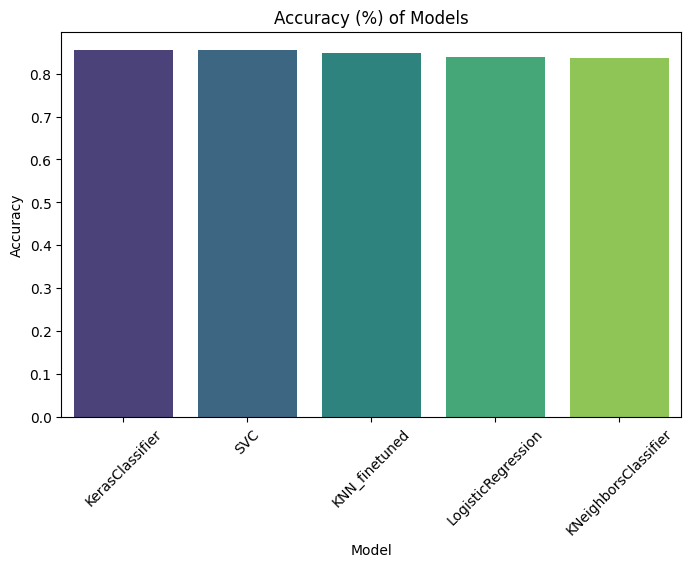

In [505]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_metrics.sort_values(by='accuracy',ascending=False), x='model', y='accuracy', palette='viridis')
plt.title('Accuracy (%) of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17048\1619098059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics.sort_values(by='precision',ascending=False), x='model', y='precision', palette='viridis')


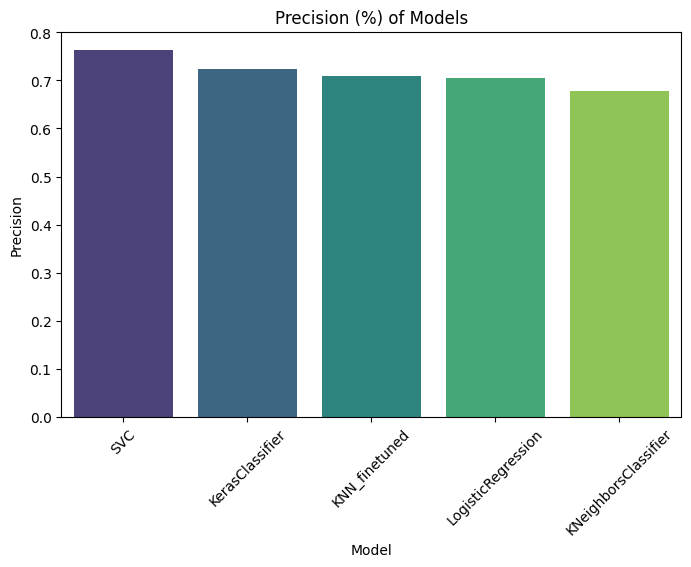

In [506]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_metrics.sort_values(by='precision',ascending=False), x='model', y='precision', palette='viridis')
plt.title('Precision (%) of Models')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)  
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17048\299825616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics.sort_values(by='recall',ascending=False), x='model', y='recall', palette='viridis')


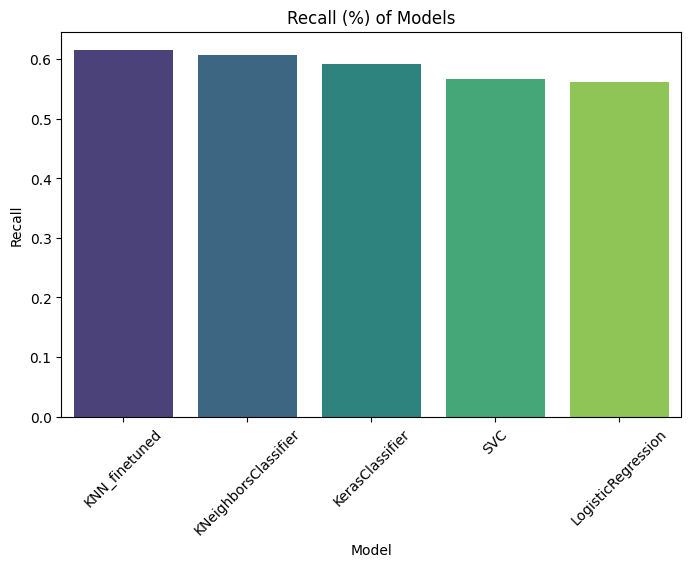

In [507]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_metrics.sort_values(by='recall',ascending=False), x='model', y='recall', palette='viridis')
plt.title('Recall (%) of Models')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)  
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17048\1961192466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics.sort_values(by='f1',ascending=False), x='model', y='f1', palette='viridis')


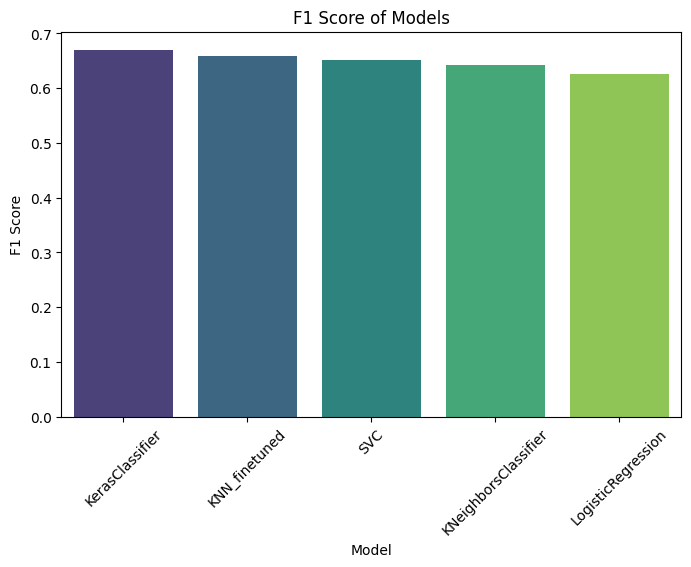

In [508]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_metrics.sort_values(by='f1',ascending=False), x='model', y='f1', palette='viridis')
plt.title('F1 Score of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)  
plt.show()